In [27]:
import numpy as np
from utils import momento

In [28]:
import os
import pandas as pd 

data_path = os.path.join('.','datos','datosmasas.csv')

dt = pd.read_csv(data_path, index_col=0)
dt.head()

,masas,x,y,z
particula,,,,
1,2.0,-53.0,79.0,-91.0
2,2.0,13.0,-142.0,-177.0
3,2.0,-109.0,-103.0,-120.0
4,2.0,4.0,-96.0,110.0
5,4.0,222.0,-22.0,-236.0


In [29]:
import matplotlib.pyplot as plt 

masas = np.array(dt['masas'])
masas = masas[:, None]

x = np.array(dt['x'])
y = np.array(dt['y'])
z = np.array(dt['z'])

print(x.shape)


(1533,)


In [30]:
_input = np.stack([x,y, z], 1)

momento0 = momento( masas, _input, n=0)
momento1 = momento( masas, _input, n=1)
momento2 = momento( masas, _input, n=2)

In [31]:
print("Momento 0  - Masa total del sistema")
print(momento0)

Momento 0  - Masa total del sistema
[[4627.]]


In [32]:
momento1[1]

array([4850.6347032])

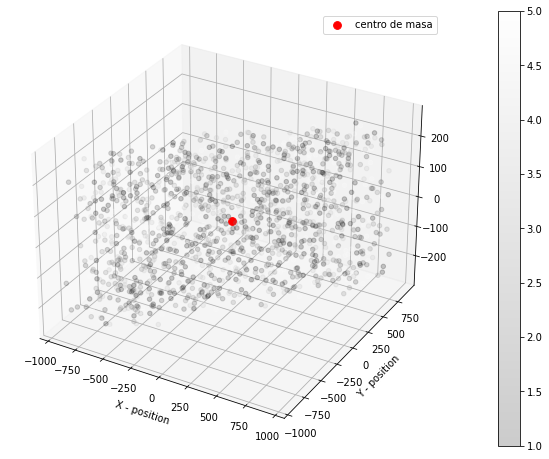

In [79]:


x_center = x - np.mean(x)
y_center = y - np.mean(y)
z_center = z - np.mean(z)

normalize_center = momento1/momento0
cmasa_x , cmasa_y, cmasa_z = normalize_center[0] , normalize_center[1] , normalize_center[2]

fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(projection='3d')
sc = ax.scatter(x_center, y_center, z_center, c=masas, cmap='gray', alpha=0.2)
plt.xlabel("X - position")
plt.ylabel("Y - position")
ax.scatter(cmasa_x, cmasa_y, cmasa_z, s=60, c='red', label='centro de masa')
plt.legend()
plt.colorbar(sc)




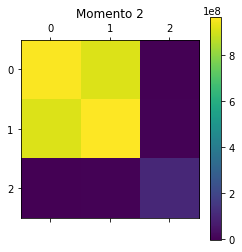

In [34]:
plt.matshow(momento2 )
plt.title("Momento 2")
plt.colorbar()
plt.show()

In [35]:
vectori = np.array([1, 0, 0])[:, None]
vectorj = np.array([0, 1, 0])[:, None]
vectork = np.array([0, 0, 1])[:, None]

base = [vectori, vectorj, vectork]



* ¿Los vectores base del sistema cartesiano constituyen una base propia para esta distribución de masa? Esto es: ¿Los vectores cartesianos son autovectores del tensor momento de inercia?

Dada la definición formal: Sea $A : V \rightarrow V$ un operador lineal de cierto $\mathbb{K}$-espacio vectorial $V$ y un vector $\textbf{v}$ no nulo en $V$. Si existe un escalar $c$ tal que:

$$ A\textbf{v} = c\textbf{v}, \quad \textbf{v} \neq 0, \quad c \in \mathbb{K}, $$

entonces decirmos que $\textbf{v}$ es un vector propio del operador $A$. 

Dicho esto, una forma de verificar que los vector base del sistema cartesiano $|e_i\rangle$ sean autovectores del tensor momento de inceria $M_2$ consiste en realizar la transformación $M_2|e_i\rangle$ y verificar si esta transformación se pude espresar como $c|e_i\rangle$ dada la definición del vector propio. Como podemos observar a continuación, los vectores de la base cartesiana no son autovectores del tensor momento de inercia.


In [36]:

for vi in base:
    _lambda  = ( momento2 @ vi )
    print("ei: ", vi.flatten())
    print("M|ei>: ",_lambda.flatten())

ei:  [1 0 0]
M|ei>:  [ 9.58603863e+08  9.11766544e+08 -7.13422686e+06]
ei:  [0 1 0]
M|ei>:  [ 9.11766544e+08  9.63665233e+08 -1.92746259e+06]
ei:  [0 0 1]
M|ei>:  [-7.13422686e+06 -1.92746259e+06  1.01844217e+08]


In [37]:
w, v = np.linalg.eig(momento2)

v1 = v[0]
v2 = v[1]
v3 = v[2]

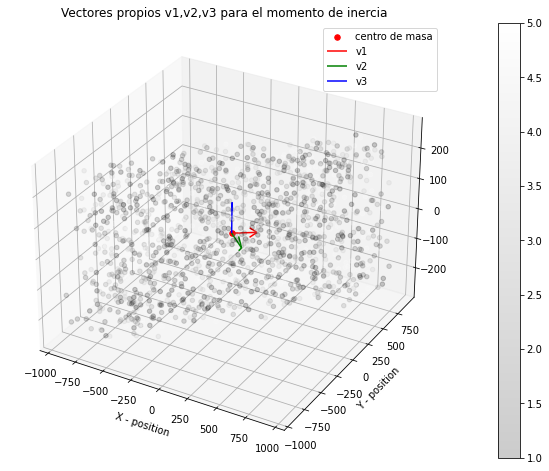

In [77]:

fig = plt.figure(figsize=(20, 8))


ax = fig.add_subplot(projection='3d')
sc = ax.scatter(x_center, y_center, z_center, c=masas, cmap='gray', alpha=0.2)
plt.xlabel("X - position")
plt.ylabel("Y - position")
ax.scatter(cmasa_x, cmasa_y, cmasa_z, s=30, c='red', label='centro de masa')


ax.quiver( cmasa_x, cmasa_y, cmasa_z, v1[0], v1[1], v1[2], length=200 , facecolor='r', edgecolor='r', label='v1')
ax.quiver( cmasa_x, cmasa_y, cmasa_z, v2[0], v2[1], v2[2], length=300 , facecolor='g', edgecolor='g', label='v2')
ax.quiver( cmasa_x, cmasa_y, cmasa_z, v3[0], v3[1], v3[2], length=100 , facecolor='b', edgecolor='b', label='v3')
ax.set_title("Vectores propios v1,v2,v3 para el momento de inercia")

plt.legend()
plt.colorbar(sc)

* Encuentre la matriz de transformación de la base cartesiana a la base de autovectores conformada por los ejes principales.

Dado los vectores del sistema cartesiano $|e_i \rangle $, es necesario encontrar la matriz de transformación $T$ mediante la cual se realiza el cambio a los autovectores para la nueva base $|e_i\rangle \rightarrow |v_i\rangle$.

Teniendo encuenta que

$$ \begin{bmatrix} 1  \\ 0 \\ 0 \end{bmatrix} \rightarrow \begin{bmatrix} a  \\ b \\ c \end{bmatrix} = |v_1 \rangle^{\top},$$


$$ \begin{bmatrix} 0  \\ 1 \\ 0 \end{bmatrix} \rightarrow \begin{bmatrix} d  \\ e \\ f \end{bmatrix} = |v_2 \rangle^{\top}, $$


$$ \begin{bmatrix} 0  \\ 0 \\ 1 \end{bmatrix} \rightarrow \begin{bmatrix} g  \\ h \\ i \end{bmatrix} = |v_3 \rangle^{\top}, $$

luego, tenemos que la matriz de transformación se puede construir mediante la combinación de los autovectores. De esta forma, la matriz de transformación es:

$$
\begin{bmatrix}
a & d & g \\ b & e & h \\ c & f & i \end{bmatrix} = \begin{bmatrix} v_1^{\top}  & v_2^{\top}  & v_3^{\top} \end{bmatrix}

$$


In [80]:
tranform_matrix = v.T
new_basis = tranform_matrix @ _input.T
_input.shape

(1533, 3)

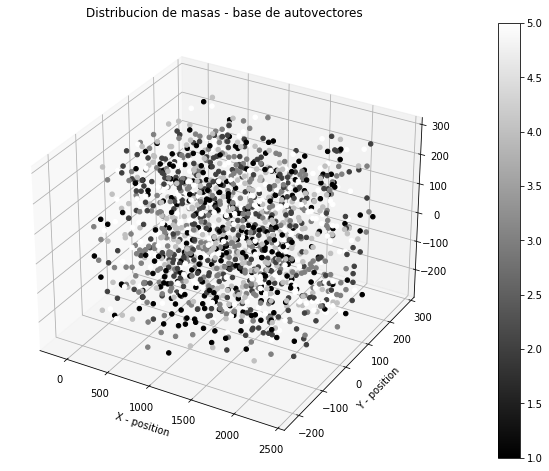

In [85]:

fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(projection='3d')
sc = ax.scatter(new_basis[0], new_basis[1], new_basis[2], c=masas, cmap='gray', alpha=1)
plt.xlabel("X - position")
plt.ylabel("Y - position")
plt.colorbar(sc)
ax.set_title("Distribucion de masas - base de autovectores")
plt.show()


